In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading the dataset

In [2]:
df = pd.read_csv("gfed_1998_2016_w_fire_spots.csv")
df

,year,month,burned_fraction,source,basis_regions,C,DM,BB,NPP,Rh,grid_cell_area,latitude,longitude,burned_area,fire_spots
0,1998.0,1.0,0.005469,5.0,4.0,2.650900,0.005431,2.650900,58.339676,51.594074,768498688.0,5.125,-61.125,4.202725,0.0
1,1998.0,1.0,0.002704,5.0,4.0,1.325058,0.002714,1.325058,55.579704,45.457546,768498688.0,5.125,-60.875,2.077722,1.0
2,1998.0,1.0,0.000067,5.0,4.0,0.151541,0.000310,0.151541,72.492561,59.110123,768498688.0,5.125,-60.625,0.051836,2.0
3,1998.0,1.0,0.000060,5.0,4.0,0.132077,0.000270,0.132077,87.867409,79.517639,768498688.0,5.125,-60.375,0.046354,1.0
4,1998.0,1.0,0.000000,5.0,4.0,0.000000,0.000000,0.000000,83.103928,80.273766,768498688.0,5.125,-60.125,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513054,2013.0,8.0,0.000000,2.0,5.0,0.000000,0.000000,0.000000,96.202339,73.396408,769070912.0,-4.625,-67.625,0.000000,0.0
1513055,2013.0,8.0,0.000000,2.0,5.0,0.000000,0.000000,0.000000,97.872314,66.450356,769070912.0,-4.625,-67.375,0.000000,0.0
1513056,2013.0,8.0,0.000000,2.0,5.0,0.000000,0.000000,0.000000,99.717766,67.008438,769070912.0,-4.625,-67.125,0.000000,0.0
1513057,2013.0,8.0,0.000000,2.0,5.0,0.000000,0.000000,0.000000,99.584618,74.850380,769070912.0,-4.625,-66.875,0.000000,18.0


In [3]:
#meaning of the features

    # burned_fraction: Percentage of the grid cell that were burned.
    # burned_area: whole area affected by the fire in ha
    # source: sattelite that detected the fire emissions and burned area.
    # basis_region: region affected by the fire.
    # C: Carbon emissions, units are provided in g C/m2/month.
    # DM: Dry matter emissions (measurement of the mass of something when completely dried)
    # BB: Biomass burning (burning of living and dead vegetation). 
    # NPP: Net primary production (amount of carbon retained in an ecosystem)
    # Rh: heterotrophic respiration
    # latitude/longitude: coordinates of the location of the fire
    # fire_spots: spot fires are ignited outside the perimeter of the main fire.

## 2. Data Mining

In [4]:
#general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513059 entries, 0 to 1513058
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   year             1513059 non-null  float64
 1   month            1513058 non-null  float64
 2   burned_fraction  1513058 non-null  float64
 3   source           1513058 non-null  float64
 4   basis_regions    1513058 non-null  float64
 5   C                1513058 non-null  float64
 6   DM               1513058 non-null  float64
 7   BB               1513058 non-null  float64
 8   NPP              1513058 non-null  float64
 9   Rh               1513058 non-null  float64
 10  grid_cell_area   1513058 non-null  float64
 11  latitude         1513058 non-null  float64
 12  longitude        1513058 non-null  float64
 13  burned_area      1513058 non-null  float64
 14  fire_spots       1513058 non-null  float64
dtypes: float64(15)
memory usage: 173.2 MB


In [5]:
#checking the numerical info of the data
df.describe()

,year,month,burned_fraction,source,basis_regions,C,DM,BB,NPP,Rh,grid_cell_area,latitude,longitude,burned_area,fire_spots
count,1.513059e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06,1.513058e+06
mean,2.005316e+03,6.409966e+00,1.928475e-03,2.429066e+00,4.752863e+00,2.875078e+00,5.866845e-03,2.875078e+00,7.708528e+01,7.553004e+01,7.638793e+08,-5.866619e+00,-5.816748e+01,1.458510e+00,1.435336e+00
std,4.797328e+00,3.438644e+00,1.379764e-02,1.112732e+00,7.065229e-01,2.929854e+01,5.966694e-02,2.929854e+01,2.251441e+01,1.500849e+01,8.696781e+06,5.602570e+00,7.258028e+00,1.040828e+01,5.728121e+00
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.353642e+08,-1.762500e+01,-7.387500e+01,0.000000e+00,0.000000e+00
25%,2.001000e+03,3.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.301876e+01,6.961567e+01,7.595671e+08,-1.012500e+01,-6.387500e+01,0.000000e+00,0.000000e+00
50%,2.005000e+03,6.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.719397e+01,7.634612e+01,7.675306e+08,-5.875000e+00,-5.787500e+01,0.000000e+00,0.000000e+00
75%,2.009000e+03,9.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.218579e+01,8.362660e+01,7.707737e+08,-1.375000e+00,-5.237500e+01,0.000000e+00,1.000000e+00
max,2.013000e+03,1.200000e+01,9.658171e-01,5.000000e+00,5.000000e+00,6.505789e+03,1.323191e+01,6.505789e+03,1.756241e+02,3.029367e+02,7.715815e+08,5.125000e+00,-4.437500e+01,7.305705e+02,5.900000e+02


In [6]:
# checking the entries in each feature
df.nunique(axis=0)

year                    17
month                   12
burned_fraction     298604
source                   5
basis_regions            3
C                   341983
DM                  341972
BB                  341983
NPP                1387252
Rh                 1293137
grid_cell_area          71
latitude                92
longitude              119
burned_area         299159
fire_spots             249
dtype: int64

In [7]:
# checking the number of fires that had at least one spot fire
count = df.fire_spots[df.fire_spots > 0].count()
count

390983

In [8]:
# checking distribution of the data per year
# the period of the dataset is between jan/1998 until august/2013
df.year.value_counts()

1998.0    96875
1999.0    96875
2012.0    96875
2011.0    96875
2010.0    96875
2009.0    96875
2008.0    96875
2007.0    96875
2006.0    96875
2005.0    96875
2004.0    96875
2003.0    96875
2002.0    96875
2001.0    96875
2000.0    96875
2013.0    59933
2.0           1
Name: year, dtype: int64

In [9]:
#checking the basis_regions: 
df.basis_regions.value_counts() # 3 regions identified: ocean (0), southern hemishpere southamerica(4) and north hemisphere south america (5)

5.0    1233878
4.0     255492
0.0      23688
Name: basis_regions, dtype: int64

In [10]:
# checking NAN values
df.isna().sum()

year               0
month              1
burned_fraction    1
source             1
basis_regions      1
C                  1
DM                 1
BB                 1
NPP                1
Rh                 1
grid_cell_area     1
latitude           1
longitude          1
burned_area        1
fire_spots         1
dtype: int64

In [11]:
# creating dfa dataset, fraction of the main dataset with the main numerical features

dfa = df[['burned_fraction', 'C', 'DM', 'BB', 'NPP', 'Rh', 'burned_area', 'fire_spots']].copy()
dfa

,burned_fraction,C,DM,BB,NPP,Rh,burned_area,fire_spots
0,0.005469,2.650900,0.005431,2.650900,58.339676,51.594074,4.202725,0.0
1,0.002704,1.325058,0.002714,1.325058,55.579704,45.457546,2.077722,1.0
2,0.000067,0.151541,0.000310,0.151541,72.492561,59.110123,0.051836,2.0
3,0.000060,0.132077,0.000270,0.132077,87.867409,79.517639,0.046354,1.0
4,0.000000,0.000000,0.000000,0.000000,83.103928,80.273766,0.000000,0.0
...,...,...,...,...,...,...,...,...
1513054,0.000000,0.000000,0.000000,0.000000,96.202339,73.396408,0.000000,0.0
1513055,0.000000,0.000000,0.000000,0.000000,97.872314,66.450356,0.000000,0.0
1513056,0.000000,0.000000,0.000000,0.000000,99.717766,67.008438,0.000000,0.0
1513057,0.000000,0.000000,0.000000,0.000000,99.584618,74.850380,0.000000,18.0


/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


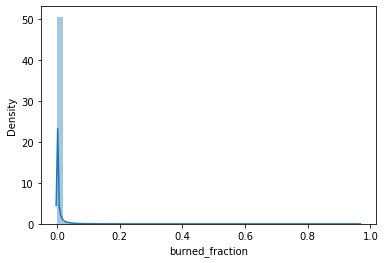

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


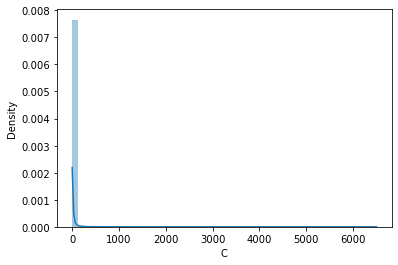

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


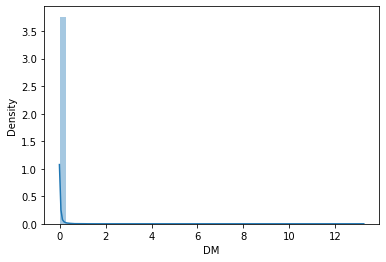

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


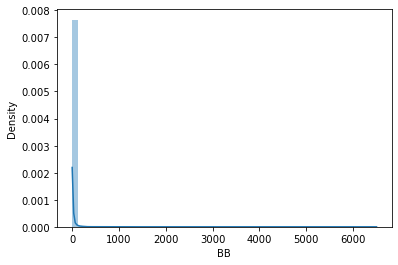

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


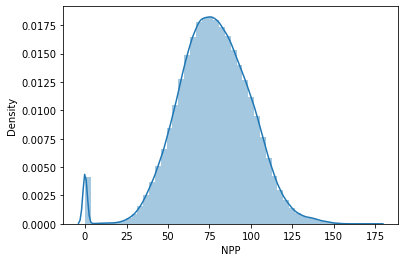

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


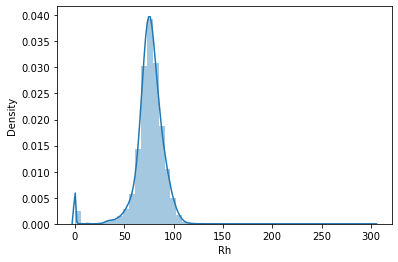

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


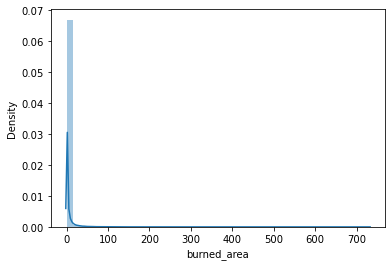

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


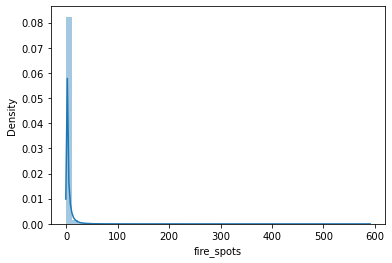

In [12]:
# checking the distribution of the main numerical features 
for col in dfa.columns:
    sns.distplot(dfa[col])
    plt.show()
    
# NPP and Rh are close to gaussian distribution
# Most of the other features are skewed, with positive values of outliars probably related to big dimensions fires throughout the years  


/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


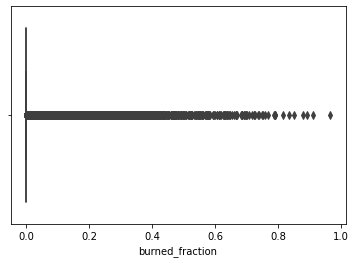

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


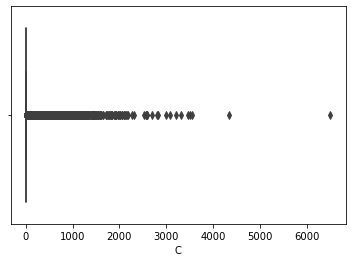

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


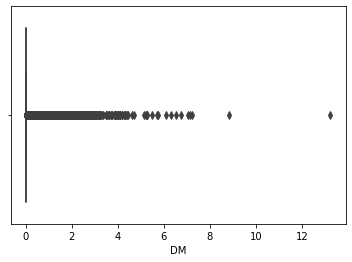

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


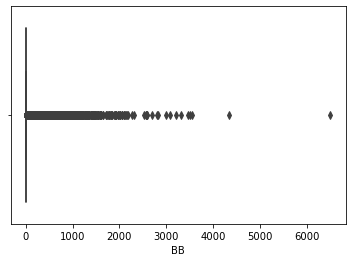

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


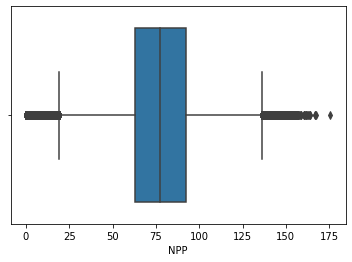

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


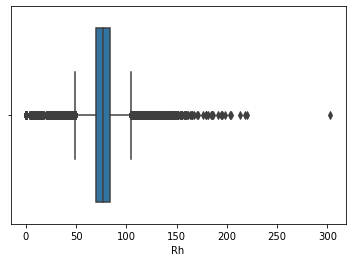

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


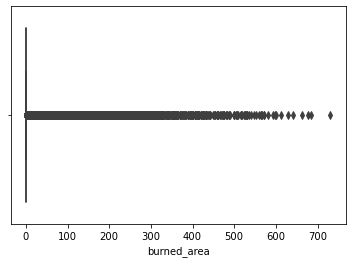

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


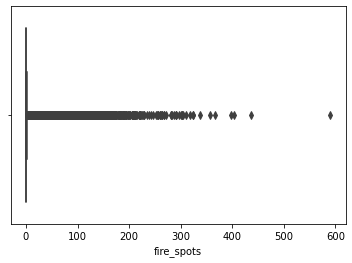

In [13]:
# double checking the outliers of the main numerical features through boxplots
for col in dfa.columns:
    sns.boxplot(dfa[col])
    plt.show()


# Possible approach 1: keep all sizes of fires -> keep all the outliers 
# Possible approach 2: keep all sizes of fires -> remove outliers from NPP and Rh (whose distributions are almost normalized already)
# Possible approach 3: focus on small fires only -> remove all outliers

## 3. Data Cleaning + 4. Data Exploration

In [14]:
# PS: some other plots were done in Tableau for the exploration process and are displayed in the ppt document

In [15]:
# drop NAN values as there is only one row in the dataset
df1 = df.dropna()
df1.isna().sum()

year               0
month              0
burned_fraction    0
source             0
basis_regions      0
C                  0
DM                 0
BB                 0
NPP                0
Rh                 0
grid_cell_area     0
latitude           0
longitude          0
burned_area        0
fire_spots         0
dtype: int64

In [16]:
# removing the values of basis_regions = 0 (ocean) to focus exclusively in the amazon forest
# removing the values of burned_area = 0 to focus only in the data that shows an area affected by the fire  

df1 = df1[(df1[['burned_area', 'basis_regions']] > 0).all(axis=1)]
df1

,year,month,burned_fraction,source,basis_regions,C,DM,BB,NPP,Rh,grid_cell_area,latitude,longitude,burned_area,fire_spots
0,1998.0,1.0,0.005469,5.0,4.0,2.650900,0.005431,2.650900,58.339676,51.594074,768498688.0,5.125,-61.125,4.202725,0.0
1,1998.0,1.0,0.002704,5.0,4.0,1.325058,0.002714,1.325058,55.579704,45.457546,768498688.0,5.125,-60.875,2.077722,1.0
2,1998.0,1.0,0.000067,5.0,4.0,0.151541,0.000310,0.151541,72.492561,59.110123,768498688.0,5.125,-60.625,0.051836,2.0
3,1998.0,1.0,0.000060,5.0,4.0,0.132077,0.000270,0.132077,87.867409,79.517639,768498688.0,5.125,-60.375,0.046354,1.0
11,1998.0,1.0,0.001205,5.0,4.0,4.199054,0.008601,4.199054,104.003830,81.827896,768792128.0,4.875,-61.875,0.926281,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513023,2013.0,8.0,0.001129,2.0,5.0,0.553848,0.001134,0.553848,88.920845,78.326477,769335040.0,-4.375,-46.875,0.868819,1.0
1513024,2013.0,8.0,0.002479,2.0,5.0,1.177980,0.002413,1.177980,90.860199,71.313339,769335040.0,-4.375,-46.625,1.907033,0.0
1513025,2013.0,8.0,0.002179,2.0,5.0,1.038743,0.002127,1.038743,81.955917,76.942467,769335040.0,-4.375,-46.375,1.676363,0.0
1513031,2013.0,8.0,0.000826,2.0,5.0,0.273318,0.000560,0.273318,85.785767,74.289566,769335040.0,-4.375,-44.875,0.635678,0.0


/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


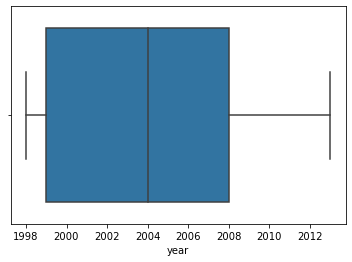

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


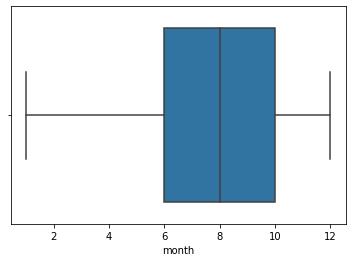

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


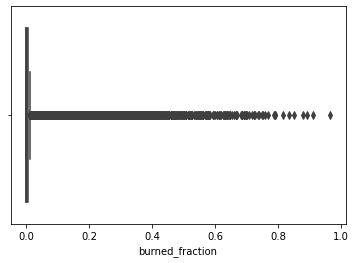

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


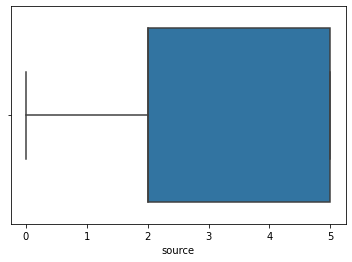

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


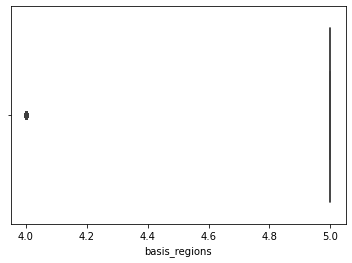

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


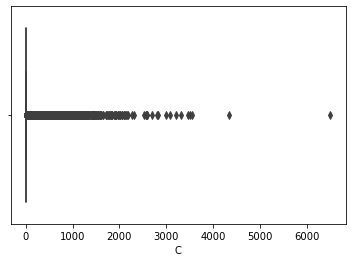

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


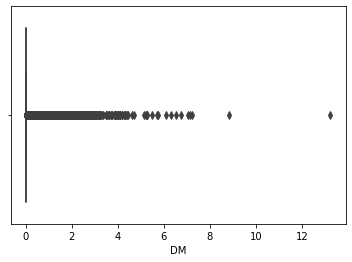

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


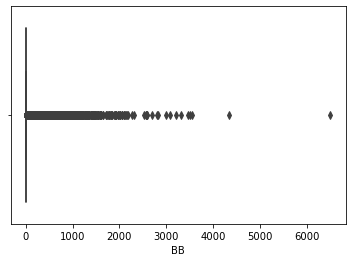

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


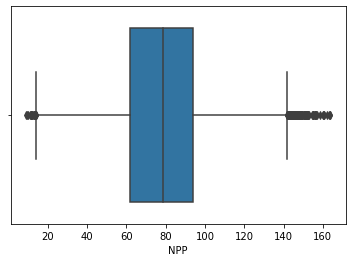

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


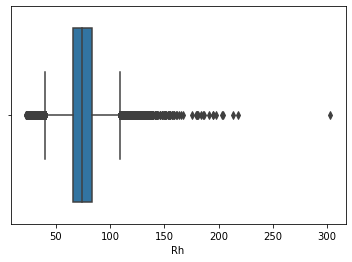

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


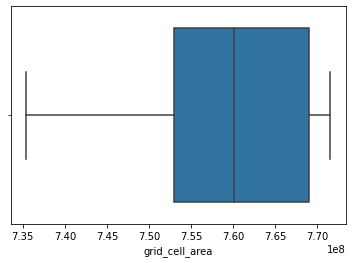

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


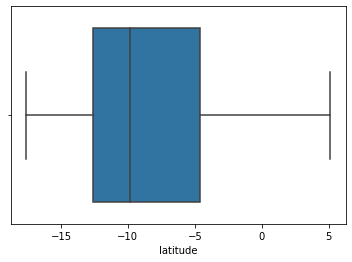

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


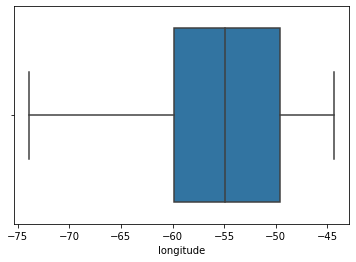

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


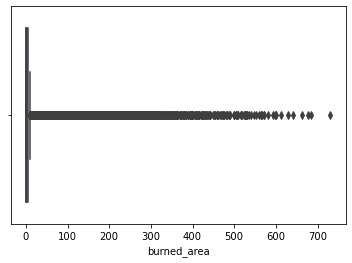

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


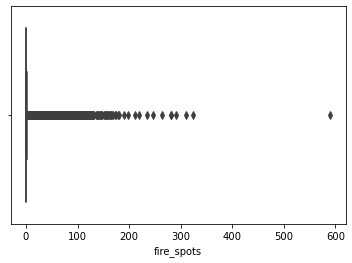

In [17]:
for col in df1.columns:
    sns.boxplot(df1[col])
    plt.show()

,year,month,burned_fraction,source,basis_regions,C,DM,BB,NPP,Rh,grid_cell_area,latitude,longitude,burned_area,fire_spots
0,1998.0,1.0,0.005469,5.0,4.0,2.650900,0.005431,2.650900,58.339676,51.594074,768498688.0,5.125,-61.125,4.202725,0.0
1,1998.0,1.0,0.002704,5.0,4.0,1.325058,0.002714,1.325058,55.579704,45.457546,768498688.0,5.125,-60.875,2.077722,1.0
2,1998.0,1.0,0.000067,5.0,4.0,0.151541,0.000310,0.151541,72.492561,59.110123,768498688.0,5.125,-60.625,0.051836,2.0
3,1998.0,1.0,0.000060,5.0,4.0,0.132077,0.000270,0.132077,87.867409,79.517639,768498688.0,5.125,-60.375,0.046354,1.0
11,1998.0,1.0,0.001205,5.0,4.0,4.199054,0.008601,4.199054,104.003830,81.827896,768792128.0,4.875,-61.875,0.926281,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513023,2013.0,8.0,0.001129,2.0,5.0,0.553848,0.001134,0.553848,88.920845,78.326477,769335040.0,-4.375,-46.875,0.868819,1.0
1513024,2013.0,8.0,0.002479,2.0,5.0,1.177980,0.002413,1.177980,90.860199,71.313339,769335040.0,-4.375,-46.625,1.907033,0.0
1513025,2013.0,8.0,0.002179,2.0,5.0,1.038743,0.002127,1.038743,81.955917,76.942467,769335040.0,-4.375,-46.375,1.676363,0.0
1513031,2013.0,8.0,0.000826,2.0,5.0,0.273318,0.000560,0.273318,85.785767,74.289566,769335040.0,-4.375,-44.875,0.635678,0.0


/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NPP', ylabel='Density'>

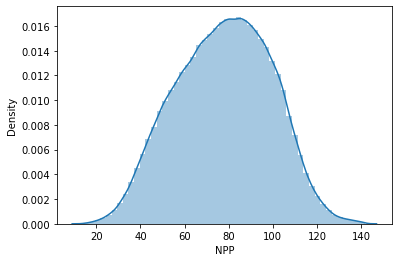

In [18]:
# Dealing with outliers: we decided to remove the outlierd from NPP and Rh as both are close to be normalized
# we decided not to remove outliers from the other features to make sure that every fire magnitude is considered in the analysis

# Removing outliers from NPP
iqr = np.percentile(df1["NPP"], 75) - np.percentile(df1["NPP"], 25)
upper_limit = np.percentile(df1["NPP"], 75) + 1.5 * iqr
lower_limit = np.percentile(df1["NPP"], 25) - 1.5 * iqr

mask = (df1["NPP"] <= upper_limit) & (df1["NPP"] >= lower_limit)
df_temp = df1[mask]
display(df_temp)
sns.distplot(df_temp["NPP"])

,year,month,burned_fraction,source,basis_regions,C,DM,BB,NPP,Rh,grid_cell_area,latitude,longitude,burned_area,fire_spots
0,1998.0,1.0,0.005469,5.0,4.0,2.650900,0.005431,2.650900,58.339676,51.594074,768498688.0,5.125,-61.125,4.202725,0.0
1,1998.0,1.0,0.002704,5.0,4.0,1.325058,0.002714,1.325058,55.579704,45.457546,768498688.0,5.125,-60.875,2.077722,1.0
2,1998.0,1.0,0.000067,5.0,4.0,0.151541,0.000310,0.151541,72.492561,59.110123,768498688.0,5.125,-60.625,0.051836,2.0
3,1998.0,1.0,0.000060,5.0,4.0,0.132077,0.000270,0.132077,87.867409,79.517639,768498688.0,5.125,-60.375,0.046354,1.0
11,1998.0,1.0,0.001205,5.0,4.0,4.199054,0.008601,4.199054,104.003830,81.827896,768792128.0,4.875,-61.875,0.926281,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513023,2013.0,8.0,0.001129,2.0,5.0,0.553848,0.001134,0.553848,88.920845,78.326477,769335040.0,-4.375,-46.875,0.868819,1.0
1513024,2013.0,8.0,0.002479,2.0,5.0,1.177980,0.002413,1.177980,90.860199,71.313339,769335040.0,-4.375,-46.625,1.907033,0.0
1513025,2013.0,8.0,0.002179,2.0,5.0,1.038743,0.002127,1.038743,81.955917,76.942467,769335040.0,-4.375,-46.375,1.676363,0.0
1513031,2013.0,8.0,0.000826,2.0,5.0,0.273318,0.000560,0.273318,85.785767,74.289566,769335040.0,-4.375,-44.875,0.635678,0.0


/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rh', ylabel='Density'>

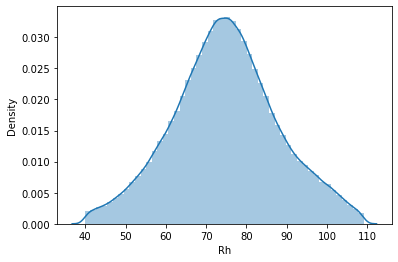

In [19]:
# Removing outliers from Rh

iqr = np.percentile(df_temp["Rh"], 75) - np.percentile(df_temp["Rh"], 25)
upper_limit = np.percentile(df_temp["Rh"], 75) + 1.5 * iqr
lower_limit = np.percentile(df_temp["Rh"], 25) - 1.5 * iqr

mask = (df_temp["Rh"] <= upper_limit) & (df_temp["Rh"] >= lower_limit)
df2 = df_temp[mask]
display(df2)
sns.distplot(df2["Rh"])

In [20]:
# df -> original dataset
# dfa -> dataset with main numerical for analysis
# df1 -> cleaned dataset #1 -> 0 values for burned_area and basis_regions removed + NANs dropped
# df2 -> cleaned dataset #2 -> NPP and Rh outliers removed

print(df.shape)
print(dfa.shape)
print(df1.shape)
print(df2.shape)

(1513059, 15)
(1513059, 8)
(342610, 15)
(334610, 15)


<AxesSubplot:xlabel='year', ylabel='fire_spots'>

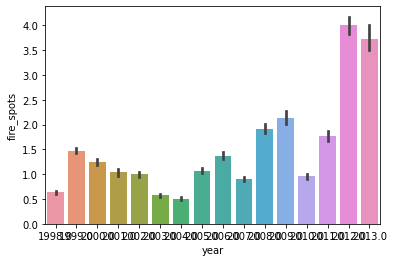

In [21]:
# fire spots throughout the years
sns.barplot(data=df2, x='year', y='fire_spots')

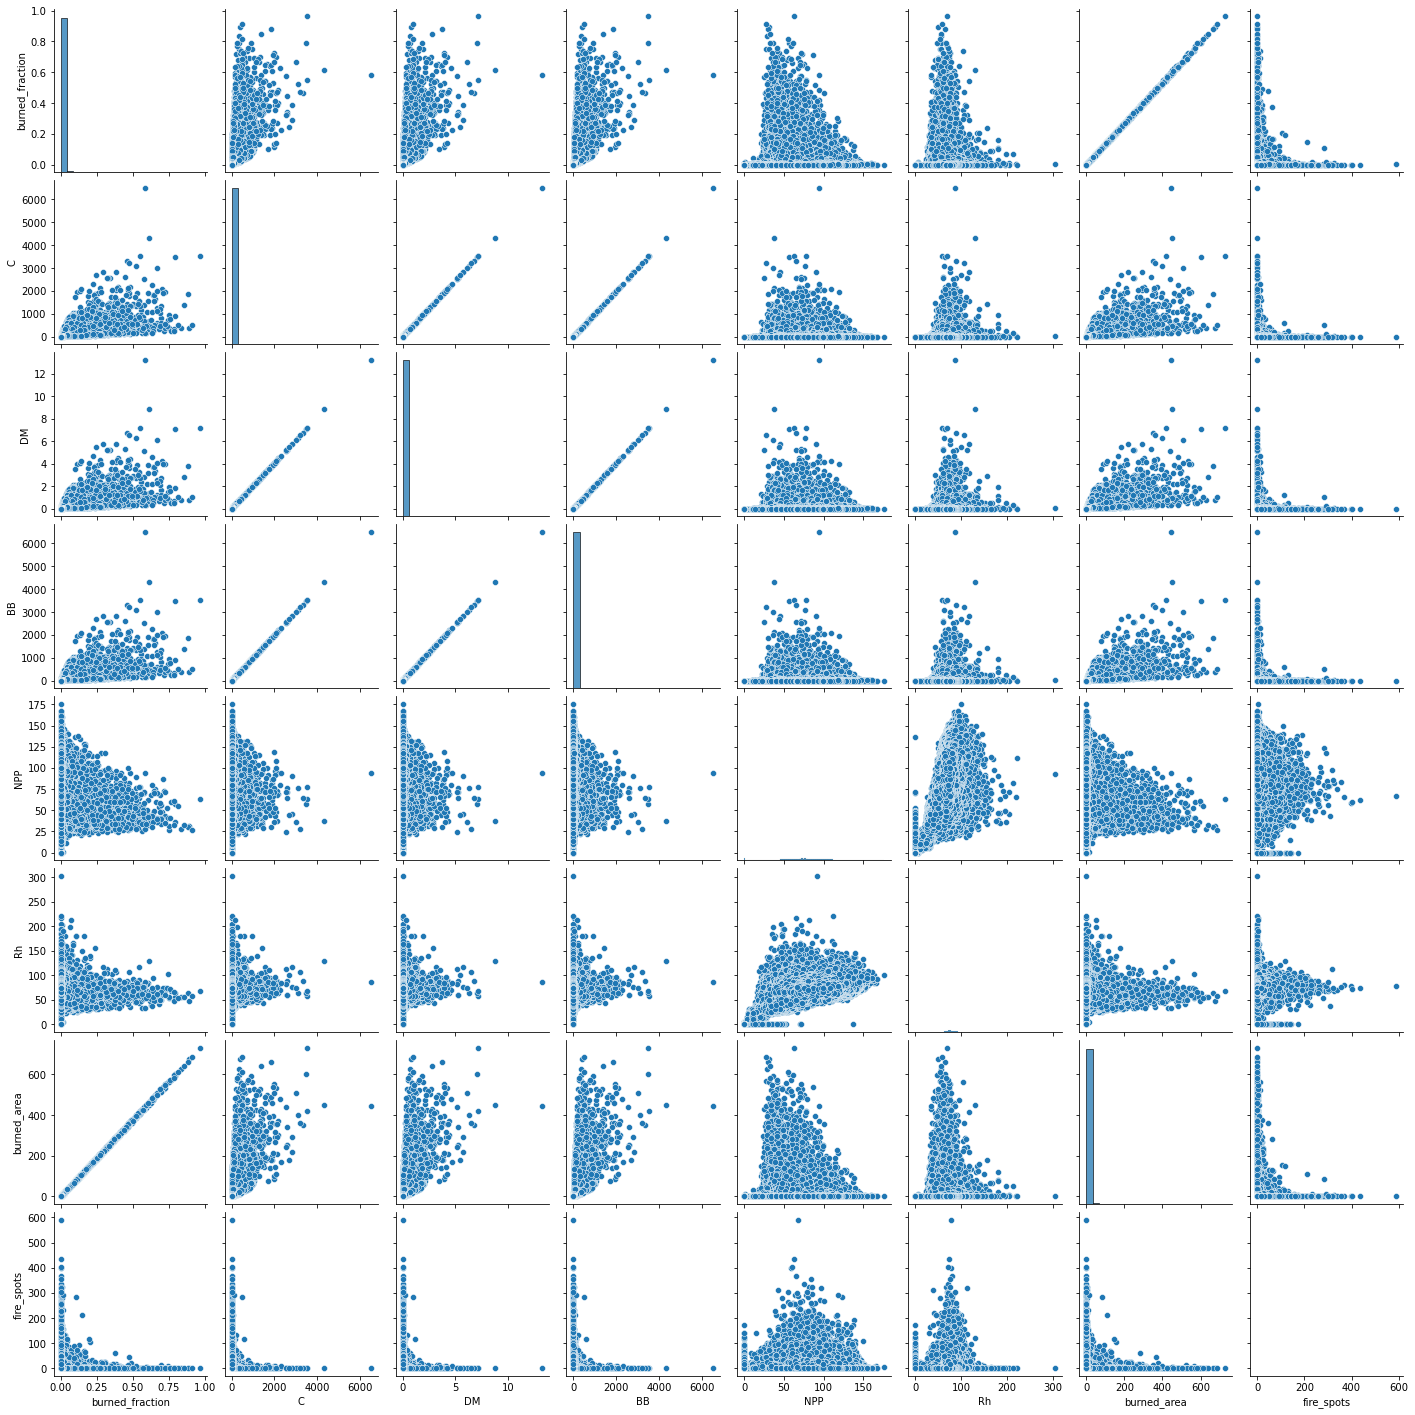

In [22]:
# many features strongly correlating

sns.pairplot(data=dfa)

In [23]:
df2.burned_area.sum()

2115433.0061724614

In [24]:
df2.groupby('year').sum()

,month,burned_fraction,source,basis_regions,C,DM,BB,NPP,Rh,grid_cell_area,latitude,longitude,burned_area,fire_spots
year,,,,,,,,,,,,,,
1998.0,315331.0,275.639634,196134.0,212008.0,461205.992389,941.179270,461205.992389,3.471315e+06,3.303413e+06,3.271230e+13,-360531.250,-2400749.250,208652.063325,27476.0
1999.0,315051.0,217.934982,197856.0,211534.0,347553.324169,709.546867,347553.324169,3.416937e+06,3.254867e+06,3.263740e+13,-359570.625,-2395378.875,164803.880150,63075.0
2000.0,105691.0,95.291667,99533.0,108599.0,155668.575656,317.604318,155668.575656,1.665978e+06,1.607248e+06,1.669743e+13,-203557.375,-1220527.375,71854.649237,27545.0
2001.0,100953.0,141.402335,24660.0,61001.0,154917.600342,316.746190,154917.600342,9.553963e+05,9.255878e+05,9.351196e+12,-115216.000,-670920.000,106801.824578,12774.0
2002.0,125558.0,213.448136,30498.0,75638.0,276725.383950,565.139077,276725.383950,1.162882e+06,1.146967e+06,1.155170e+13,-150827.125,-831355.875,161133.036622,15201.0
2003.0,167670.0,150.236417,42312.0,104720.0,245064.078342,500.032894,245064.078342,1.629070e+06,1.584040e+06,1.606026e+13,-190401.000,-1164670.500,113578.846564,12122.0
2004.0,175467.0,205.890484,43076.0,106617.0,329514.135537,672.295345,329514.135537,1.644612e+06,1.573443e+06,1.634770e+13,-195436.625,-1179739.125,155374.291502,10886.0
2005.0,168900.0,223.833788,42956.0,106591.0,438266.315300,893.472990,438266.315300,1.640616e+06,1.592881e+06,1.631452e+13,-191466.500,-1184746.500,169299.108454,23016.0
2006.0,153828.0,110.260712,37786.0,93631.0,192033.904269,391.733216,192033.904269,1.522092e+06,1.394032e+06,1.435580e+13,-165132.875,-1040075.375,83367.329313,25943.0


## 5. Feature Selection

,year,month,burned_fraction,source,basis_regions,C,DM,BB,NPP,Rh,grid_cell_area,latitude,longitude,burned_area,fire_spots
year,1.00,0.11,0.05,-0.74,0.04,0.03,0.03,0.03,-0.00,-0.04,0.01,-0.01,0.05,0.05,0.09
month,0.11,1.00,0.07,-0.23,0.08,0.05,0.05,0.05,-0.07,0.08,0.11,0.07,0.03,0.07,-0.00
burned_fraction,0.05,0.07,1.00,-0.13,0.04,0.64,0.64,0.64,-0.21,-0.15,-0.10,-0.12,0.08,1.00,-0.00
source,-0.74,-0.23,-0.13,1.00,-0.07,-0.09,-0.09,-0.09,0.08,0.05,0.04,0.06,-0.08,-0.13,-0.03
basis_regions,0.04,0.08,0.04,-0.07,1.00,0.03,0.03,0.03,-0.02,0.06,-0.29,-0.54,0.15,0.04,0.00
C,0.03,0.05,0.64,-0.09,0.03,1.00,1.00,1.00,-0.02,0.02,-0.04,-0.06,-0.02,0.64,-0.01
DM,0.03,0.05,0.64,-0.09,0.03,1.00,1.00,1.00,-0.02,0.02,-0.04,-0.06,-0.02,0.64,-0.01
BB,0.03,0.05,0.64,-0.09,0.03,1.00,1.00,1.00,-0.02,0.02,-0.04,-0.06,-0.02,0.64,-0.01
NPP,-0.00,-0.07,-0.21,0.08,-0.02,-0.02,-0.02,-0.02,1.00,0.47,0.13,0.10,-0.29,-0.20,0.01
Rh,-0.04,0.08,-0.15,0.05,0.06,0.02,0.02,0.02,0.47,1.00,-0.03,-0.05,-0.28,-0.15,0.00


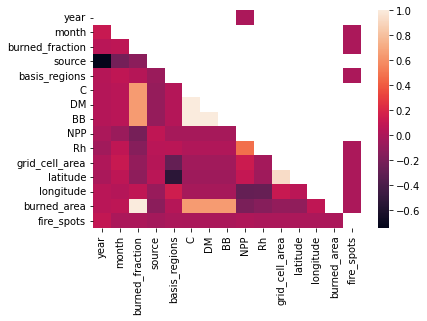

In [25]:
#checking multicollinearity

corr = df2.corr(method='pearson').round(decimals=2)
matrix = np.triu(corr)

sns.heatmap(corr, mask=matrix)
display(corr)

# strong correlations (> 0.9)
    
# Possible approach for the model: drop the following high correlated explanatory features:
    # DM, BB, burned_fraction, grid_cell_area 

In [26]:
# dropping high correlated explanatory features

df3 = df2.drop(['DM', 'BB', 'burned_fraction', 'grid_cell_area'], axis=1)
df3

,year,month,source,basis_regions,C,NPP,Rh,latitude,longitude,burned_area,fire_spots
0,1998.0,1.0,5.0,4.0,2.650900,58.339676,51.594074,5.125,-61.125,4.202725,0.0
1,1998.0,1.0,5.0,4.0,1.325058,55.579704,45.457546,5.125,-60.875,2.077722,1.0
2,1998.0,1.0,5.0,4.0,0.151541,72.492561,59.110123,5.125,-60.625,0.051836,2.0
3,1998.0,1.0,5.0,4.0,0.132077,87.867409,79.517639,5.125,-60.375,0.046354,1.0
11,1998.0,1.0,5.0,4.0,4.199054,104.003830,81.827896,4.875,-61.875,0.926281,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1513023,2013.0,8.0,2.0,5.0,0.553848,88.920845,78.326477,-4.375,-46.875,0.868819,1.0
1513024,2013.0,8.0,2.0,5.0,1.177980,90.860199,71.313339,-4.375,-46.625,1.907033,0.0
1513025,2013.0,8.0,2.0,5.0,1.038743,81.955917,76.942467,-4.375,-46.375,1.676363,0.0
1513031,2013.0,8.0,2.0,5.0,0.273318,85.785767,74.289566,-4.375,-44.875,0.635678,0.0


In [27]:
df3.basis_regions.value_counts()

5.0    315827
4.0     18783
Name: basis_regions, dtype: int64

In [28]:
df3.fire_spots.value_counts()

0.0      250286
1.0       28010
2.0       15454
3.0        9032
4.0        6310
          ...  
263.0         1
246.0         1
590.0         1
175.0         1
190.0         1
Name: fire_spots, Length: 163, dtype: int64

## 6. Prediction Model

In [29]:
# df3 -> dataset for the baseline model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, RobustScaler 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [31]:
### Linear Regression Model: predicting if the fires had or not spot fires


### Linear Regression Model: predicting the number of spot fires

In [32]:
df3l = df3

In [33]:
X = df3l.drop("fire_spots", axis=1)
y = df3l["fire_spots"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [35]:
scalarl = StandardScaler()

In [36]:
X_train = scalarl.fit_transform(X_train)
X_test = scalarl.transform(X_test)

In [37]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
print("Score of Train : {}\nScore of Test : {}".format(regressor.score(X_train,y_train),regressor.score(X_test,y_test)))

# Linear regression returns low scores, so we decided to move on to the classification tasks, encoding the values for the fire spots.

Score of Train : 0.012643521471290109
Score of Test : 0.01352464542761056


### Logistic Regression Model: predicting if the fires had or not spot fires

In [39]:
df3c = df3

In [40]:
# df3c -> dataset with fire_spots_encoded, where 0 = no detection of spot fires besides the main fire, and 1 = one or more spot fires detected besides the main fire

df3c['fire_spots_encoded'] = np.where(df3c['fire_spots'] < 1, 0, 1)
df3c

,year,month,source,basis_regions,C,NPP,Rh,latitude,longitude,burned_area,fire_spots,fire_spots_encoded
0,1998.0,1.0,5.0,4.0,2.650900,58.339676,51.594074,5.125,-61.125,4.202725,0.0,0
1,1998.0,1.0,5.0,4.0,1.325058,55.579704,45.457546,5.125,-60.875,2.077722,1.0,1
2,1998.0,1.0,5.0,4.0,0.151541,72.492561,59.110123,5.125,-60.625,0.051836,2.0,1
3,1998.0,1.0,5.0,4.0,0.132077,87.867409,79.517639,5.125,-60.375,0.046354,1.0,1
11,1998.0,1.0,5.0,4.0,4.199054,104.003830,81.827896,4.875,-61.875,0.926281,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1513023,2013.0,8.0,2.0,5.0,0.553848,88.920845,78.326477,-4.375,-46.875,0.868819,1.0,1
1513024,2013.0,8.0,2.0,5.0,1.177980,90.860199,71.313339,-4.375,-46.625,1.907033,0.0,0
1513025,2013.0,8.0,2.0,5.0,1.038743,81.955917,76.942467,-4.375,-46.375,1.676363,0.0,0
1513031,2013.0,8.0,2.0,5.0,0.273318,85.785767,74.289566,-4.375,-44.875,0.635678,0.0,0


In [41]:
# defining X and y features for the model

X = df3c.drop("fire_spots_encoded", axis=1)
y = df3c["fire_spots_encoded"]

In [42]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [43]:
# checking X_train

X_train

,year,month,source,basis_regions,C,NPP,Rh,latitude,longitude,burned_area,fire_spots
1447113,2012.0,12.0,2.0,5.0,4.378661,65.882057,86.164902,-1.375,-47.125,5.993880,6.0
189030,1999.0,12.0,5.0,5.0,1.749048,62.920879,83.075241,-4.375,-55.625,0.694262,0.0
814242,2006.0,5.0,2.0,5.0,0.313919,113.615448,81.734856,-12.625,-62.125,0.113612,0.0
1418003,2012.0,8.0,2.0,5.0,4.886685,70.106567,65.818474,-8.375,-50.375,5.320737,17.0
158541,1999.0,8.0,5.0,5.0,0.574791,120.896576,75.743675,-8.375,-72.125,0.177828,0.0
...,...,...,...,...,...,...,...,...,...,...,...
381453,2001.0,12.0,2.0,5.0,22.357630,72.647636,88.179459,-1.375,-55.875,9.056715,0.0
1104624,2009.0,5.0,2.0,5.0,17.076185,99.374771,94.998688,-11.875,-56.375,9.517235,0.0
466795,2002.0,10.0,2.0,5.0,0.897908,52.944397,81.848152,-11.625,-50.375,1.213294,0.0
553186,2003.0,9.0,2.0,5.0,0.521896,95.789124,75.472000,-6.375,-67.875,0.187512,0.0


In [44]:
#checking y_train

y_train

1447113    1
189030     0
814242     0
1418003    1
158541     0
          ..
381453     0
1104624    0
466795     0
553186     0
425838     0
Name: fire_spots_encoded, Length: 267688, dtype: int64

In [45]:
# feature scaler: RobustScaler has better performance for this dataset, which has many outliers 

preprocessor = StandardScaler()

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [46]:
# checking if the y target feature is imbalanced

y_train.value_counts()/len(y_train)

0    0.747747
1    0.252253
Name: fire_spots_encoded, dtype: float64

In [47]:
# dealing with imbalance

sm = SMOTE(k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [48]:
# checking balanced feature

y_train_SMOTE.value_counts()/len(y_train_SMOTE)

1    0.5
0    0.5
Name: fire_spots_encoded, dtype: float64

In [49]:
# running the model

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(max_iter=1000)

In [50]:
# checking the scores

pred_train_SMOTE = model.predict(X_train_SMOTE)
pred_test_SMOTE = model.predict(X_test)
print(classification_report(y_train_SMOTE, pred_train_SMOTE))
print(classification_report(y_test, pred_test_SMOTE))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200163
           1       1.00      1.00      1.00    200163

    accuracy                           1.00    400326
   macro avg       1.00      1.00      1.00    400326
weighted avg       1.00      1.00      1.00    400326

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50123
           1       1.00      1.00      1.00     16799

    accuracy                           1.00     66922
   macro avg       1.00      1.00      1.00     66922
weighted avg       1.00      1.00      1.00     66922



<AxesSubplot:>

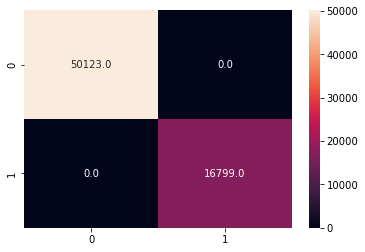

In [51]:
# checking the confusion matrix

cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt=".1f")

### Multi Classification KNN Model: ranges of spot fires

In [52]:
# df3k -> dataset for multiclass model to predict different ranges of spot fires, where:
    # 0 = no spot fires
    # 1 = 1 to 5 spot fires
    # 2 = 6 or more spot fires
    
df3k = df3

In [53]:
df3k['fire_spots_ranges'] = np.where(df3k['fire_spots'] < 1, 0, (np.where(df3k['fire_spots'] > 6, 2, 1)))
df3k

,year,month,source,basis_regions,C,NPP,Rh,latitude,longitude,burned_area,fire_spots,fire_spots_encoded,fire_spots_ranges
0,1998.0,1.0,5.0,4.0,2.650900,58.339676,51.594074,5.125,-61.125,4.202725,0.0,0,0
1,1998.0,1.0,5.0,4.0,1.325058,55.579704,45.457546,5.125,-60.875,2.077722,1.0,1,1
2,1998.0,1.0,5.0,4.0,0.151541,72.492561,59.110123,5.125,-60.625,0.051836,2.0,1,1
3,1998.0,1.0,5.0,4.0,0.132077,87.867409,79.517639,5.125,-60.375,0.046354,1.0,1,1
11,1998.0,1.0,5.0,4.0,4.199054,104.003830,81.827896,4.875,-61.875,0.926281,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513023,2013.0,8.0,2.0,5.0,0.553848,88.920845,78.326477,-4.375,-46.875,0.868819,1.0,1,1
1513024,2013.0,8.0,2.0,5.0,1.177980,90.860199,71.313339,-4.375,-46.625,1.907033,0.0,0,0
1513025,2013.0,8.0,2.0,5.0,1.038743,81.955917,76.942467,-4.375,-46.375,1.676363,0.0,0,0
1513031,2013.0,8.0,2.0,5.0,0.273318,85.785767,74.289566,-4.375,-44.875,0.635678,0.0,0,0


In [54]:
df3k = df3k.drop(['fire_spots_encoded'], axis=1)
df3k

,year,month,source,basis_regions,C,NPP,Rh,latitude,longitude,burned_area,fire_spots,fire_spots_ranges
0,1998.0,1.0,5.0,4.0,2.650900,58.339676,51.594074,5.125,-61.125,4.202725,0.0,0
1,1998.0,1.0,5.0,4.0,1.325058,55.579704,45.457546,5.125,-60.875,2.077722,1.0,1
2,1998.0,1.0,5.0,4.0,0.151541,72.492561,59.110123,5.125,-60.625,0.051836,2.0,1
3,1998.0,1.0,5.0,4.0,0.132077,87.867409,79.517639,5.125,-60.375,0.046354,1.0,1
11,1998.0,1.0,5.0,4.0,4.199054,104.003830,81.827896,4.875,-61.875,0.926281,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1513023,2013.0,8.0,2.0,5.0,0.553848,88.920845,78.326477,-4.375,-46.875,0.868819,1.0,1
1513024,2013.0,8.0,2.0,5.0,1.177980,90.860199,71.313339,-4.375,-46.625,1.907033,0.0,0
1513025,2013.0,8.0,2.0,5.0,1.038743,81.955917,76.942467,-4.375,-46.375,1.676363,0.0,0
1513031,2013.0,8.0,2.0,5.0,0.273318,85.785767,74.289566,-4.375,-44.875,0.635678,0.0,0


In [55]:
df3k.fire_spots_ranges.value_counts()

0    250286
1     66643
2     17681
Name: fire_spots_ranges, dtype: int64

In [56]:
# preparing the X and y features

X = df3k.drop("fire_spots_ranges", axis=1)
y = df3k["fire_spots_ranges"]

In [57]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [58]:
X_test.shape

(66922, 11)

In [59]:
# feature scaling

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#transforimng X_train array in pandas dataframe after scaling

df5 = pd.DataFrame(X_train, columns = X.columns)
df5

,year,month,source,basis_regions,C,NPP,Rh,latitude,longitude,burned_area,fire_spots
0,0.444444,0.50,0.0,0.0,-0.162339,-0.135004,0.095286,-0.18750,-0.707317,-0.054836,0.0
1,0.777778,-1.50,0.0,-1.0,-0.040407,-0.356022,-0.855953,1.50000,-0.512195,0.201538,0.0
2,0.222222,0.25,0.0,0.0,0.476122,-0.632840,0.097187,-0.46875,-0.097561,0.349865,1.0
3,-0.555556,-0.75,1.0,0.0,-0.134807,0.571477,0.874842,-0.15625,-1.121951,-0.214729,0.0
4,0.111111,-1.75,0.0,0.0,-0.163115,-0.021940,-0.456473,0.96875,0.170732,-0.230698,0.0
...,...,...,...,...,...,...,...,...,...,...,...
267683,-0.222222,-0.50,0.0,0.0,2.583553,-0.083500,-1.048021,0.21875,0.682927,6.691886,0.0
267684,0.777778,0.25,0.0,0.0,0.101983,-0.661864,0.871495,-0.62500,-0.219512,0.272778,0.0
267685,-0.111111,0.50,0.0,0.0,0.182814,1.217954,1.461115,-0.50000,-0.780488,-0.109872,2.0
267686,-0.333333,0.50,0.0,0.0,20.951010,0.139440,1.478196,-0.31250,0.243902,6.360452,0.0


/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


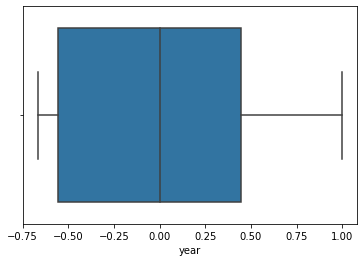

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


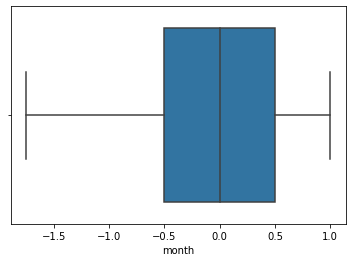

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


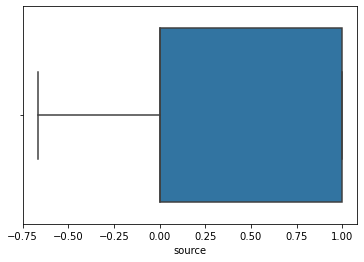

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


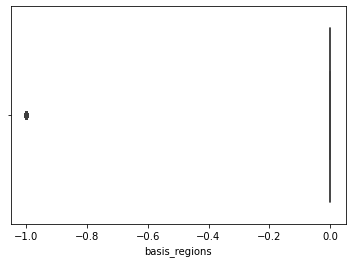

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


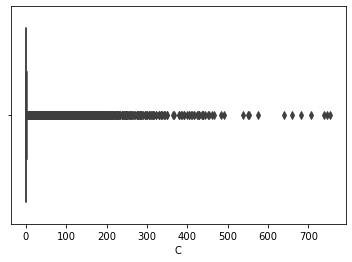

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


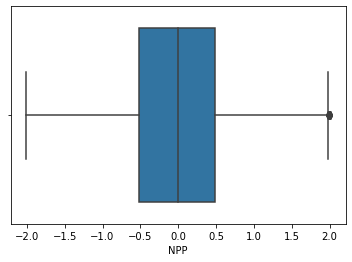

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


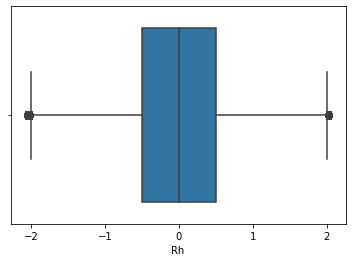

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


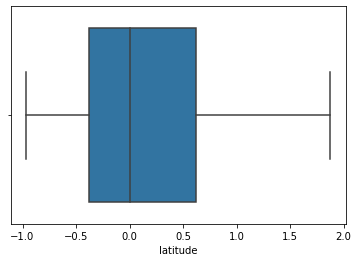

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


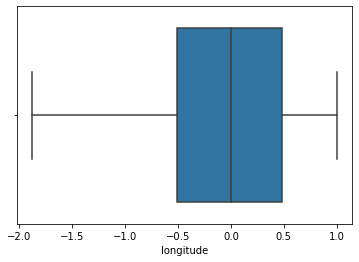

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


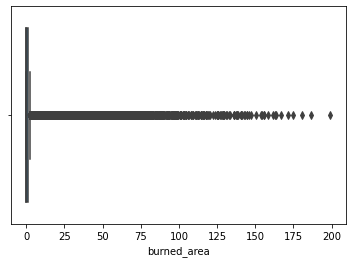

/Users/brunopoliglota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


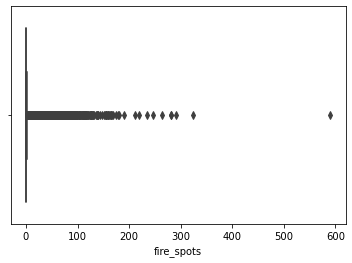

In [61]:
# checking X_train features distribution after scaling 

for col in df5.columns:
    sns.boxplot(df5[col])
    plt.show()
    
# amount of outliers is significantly lower than before
# RobustScaler is subtracting the median of each datapoint and then dividing by the interquartile range (0.25 and 0.75)

In [62]:
# checking how imbalanced is the data

y_train.value_counts()/len(y_train)

0    0.748028
1    0.199419
2    0.052554
Name: fire_spots_ranges, dtype: float64

In [63]:
# dealing with imbalanced data

from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3)

X_train_SMOTE1, y_train_SMOTE1 = sm.fit_resample(X_train, y_train)

In [64]:
y_train_SMOTE1.value_counts()

0    200238
1    200238
2    200238
Name: fire_spots_ranges, dtype: int64

In [65]:
y_train_SMOTE1.value_counts()/len(y_train_SMOTE1)

0    0.333333
1    0.333333
2    0.333333
Name: fire_spots_ranges, dtype: float64

In [66]:
# running the KNN model

knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X_train_SMOTE1,y_train_SMOTE1)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [67]:
# Checking the accuracy results

print("Accuracy on the train set: {}".format(knn.score(X_train_SMOTE1, y_train_SMOTE1)))
print("Accuracy on the test set: {}".format(knn.score(X_test, y_test)))

Accuracy on the train set: 1.0
Accuracy on the test set: 0.9962493649323092


In [68]:
# Checking the classification report

pred_train_SMOTE1 = knn.predict(X_train_SMOTE1)
pred_test_SMOTE1 = knn.predict(X_test)
print(classification_report(y_train_SMOTE1, pred_train_SMOTE1))
print(classification_report(y_test, pred_test_SMOTE1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200238
           1       1.00      1.00      1.00    200238
           2       1.00      1.00      1.00    200238

    accuracy                           1.00    600714
   macro avg       1.00      1.00      1.00    600714
weighted avg       1.00      1.00      1.00    600714

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50048
           1       0.99      0.99      0.99     13261
           2       1.00      0.99      1.00      3613

    accuracy                           1.00     66922
   macro avg       1.00      0.99      0.99     66922
weighted avg       1.00      1.00      1.00     66922



<AxesSubplot:>

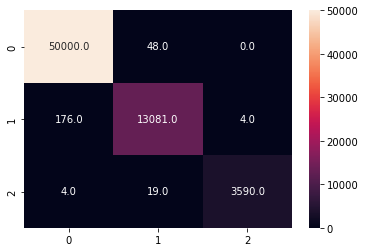

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(cm, annot=True, fmt=".1f")

Maximum accuracy:  0.9962493649323092  at K  1


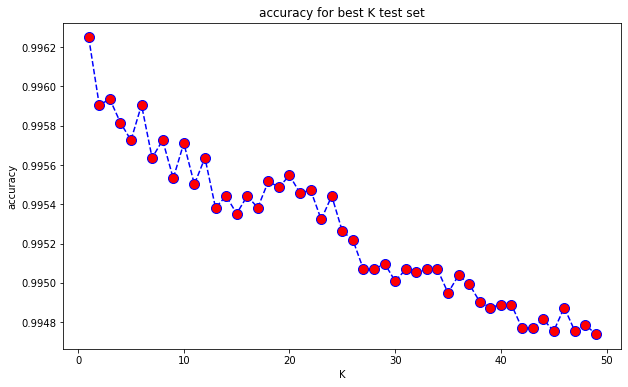

In [70]:
# Checking the best number of neighbours to use in the model

accuracy=[]

for neighbor in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_SMOTE1,y_train_SMOTE1)
    pred_test_SMOTE1 = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred_test_SMOTE1))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("accuracy for best K test set")
plt.xlabel("K")
plt.ylabel("accuracy")
print("Maximum accuracy: ", max(accuracy), " at K ", accuracy.index(max(accuracy))+1)

### Confidence Interval

In [71]:
# Calculating the confidence interval for the fire_spots feature

In [72]:
import scipy.stats as stats
import math as m

In [73]:
df3k

,year,month,source,basis_regions,C,NPP,Rh,latitude,longitude,burned_area,fire_spots,fire_spots_ranges
0,1998.0,1.0,5.0,4.0,2.650900,58.339676,51.594074,5.125,-61.125,4.202725,0.0,0
1,1998.0,1.0,5.0,4.0,1.325058,55.579704,45.457546,5.125,-60.875,2.077722,1.0,1
2,1998.0,1.0,5.0,4.0,0.151541,72.492561,59.110123,5.125,-60.625,0.051836,2.0,1
3,1998.0,1.0,5.0,4.0,0.132077,87.867409,79.517639,5.125,-60.375,0.046354,1.0,1
11,1998.0,1.0,5.0,4.0,4.199054,104.003830,81.827896,4.875,-61.875,0.926281,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1513023,2013.0,8.0,2.0,5.0,0.553848,88.920845,78.326477,-4.375,-46.875,0.868819,1.0,1
1513024,2013.0,8.0,2.0,5.0,1.177980,90.860199,71.313339,-4.375,-46.625,1.907033,0.0,0
1513025,2013.0,8.0,2.0,5.0,1.038743,81.955917,76.942467,-4.375,-46.375,1.676363,0.0,0
1513031,2013.0,8.0,2.0,5.0,0.273318,85.785767,74.289566,-4.375,-44.875,0.635678,0.0,0


In [80]:
def confidence_interval_prop(confidence_level):
    n = len(df3k)
    mean = df3k['fire_spots_ranges'].mean()
    std = df3k['fire_spots_ranges'].std()
    t =  stats.t.ppf(confidence_level, df=n-1)
    error = t * m.sqrt(mean*(1-mean)/n)
    confidence_interval = [mean - error, mean + error]
    return confidence_interval

In [81]:
conf_int = confidence_interval_prop(0.98)
print("Confidence_Interval:", conf_int)

Confidence_Interval: [0.3032130246746461, 0.30648184397841266]


In [82]:
conf_int = confidence_interval_prop(0.95)
print("Confidence_Interval:", conf_int)

Confidence_Interval: [0.3035384322414974, 0.3061564364115614]


In [83]:
# exporting the file to csv for further EDA in Tableau
df3k.to_csv('Amazon_fires_MP.csv')